# <center><a href='https://notebook.basthon.fr/?from=https://raw.githubusercontent.com/lchalmain/mp2i-info/main/tp1-8_tetris_corrige.ipynb?kernel=ocaml'>TP 1.8 : Tetris<img src=https://framagit.org/uploads/-/system/project/avatar/55763/basthon_shadow.png width=100></a></center>
***Sujet (modifié) : Info B - X/ENS 2019***

<center><h1 style="color:red">Corrigé</h1></center>

# Partie I - Initialisation et affichage de l'aire de jeu

# Question 1

In [1]:
open Graphics
type case = Vide | R | V | B | N | J
type grille = case array array

type case = Vide | R | V | B | N | J
type grille = case array array

# Question 2 - Fonctions de l'énoncé

In [2]:
let carre = 20

val carre : int = 20

In [3]:
let afficheCouleur (c:case) = let x = current_x () and y = current_y () in
    set_color begin
        match c with Vide -> white
            | R -> red
            | V -> green
            | B -> blue
            | N -> black
            | J -> yellow
        end;
    fill_rect x y carre carre ;
    rmoveto carre 0 

val afficheCouleur : case -> unit = <fun>

In [4]:
let afficheBlanc () = let x = current_x () and y = current_y () in
    set_color white;
    fill_rect x y carre carre ;
    rmoveto carre 0 

val afficheBlanc : unit -> unit = <fun>

In [5]:
let nouvelleLigne () = let y = current_y () in
    moveto 1 (y + carre)

val nouvelleLigne : unit -> unit = <fun>

In [6]:
open_graph ""    (* ouvre une fenetre graphique *)

- : unit = ()

In [7]:
let reset () = clear_graph ();    (* efface la fenetre graphique *)
moveto 1 1    (* recentre le curseur *)

val reset : unit -> unit = <fun>

# Question 2

In [8]:
let creerGrille largeur hauteur = (Array.make_matrix largeur hauteur Vide:grille)

val creerGrille : int -> int -> grille = <fun>

In [9]:
creerGrille 6 10

- : grille =
[|[|Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide|];
  [|Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide|];
  [|Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide|];
  [|Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide|];
  [|Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide|];
  [|Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide|]|]

# Question 3

In [10]:
let afficheGrille (grille:grille) = let largeur = Array.length grille and hauteur = Array.length grille.(0) in
    open_graph "";
    reset ();
    draw_rect 0 0 (largeur * carre + 1) (hauteur * carre + 1);
    for ligne = 0 to hauteur - 1 do
        for colonne = 0 to largeur - 1 do
            match grille.(colonne).(ligne) with
                | Vide -> afficheBlanc ()
                | couleur -> afficheCouleur couleur
        done;
        nouvelleLigne ()
    done

val afficheGrille : grille -> unit = <fun>

In [11]:
let (grille_test:grille) = [| [|J;    R;    R;    N;    V;    R;    Vide; Vide; Vide; Vide; Vide; Vide|];
                              [|R;    R;    B;    J;    Vide; R;    N;    V;    Vide; Vide; Vide; Vide|];
                              [|J;    N;    N;    R;    Vide; J;    Vide; Vide; Vide; Vide; Vide; Vide|];
                              [|J;    J;    Vide; R;    Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide|];
                              [|N;    Vide; R;    Vide; Vide; R;    Vide; Vide; Vide; Vide; Vide; Vide|];
                              [|Vide; V;    Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide|]|]
let () = afficheGrille grille_test

val grille_test : grille =
  [|[|J; R; R; N; V; R; Vide; Vide; Vide; Vide; Vide; Vide|];
    [|R; R; B; J; Vide; R; N; V; Vide; Vide; Vide; Vide|];
    [|J; N; N; R; Vide; J; Vide; Vide; Vide; Vide; Vide; Vide|];
    [|J; J; Vide; R; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide|];
    [|N; Vide; R; Vide; Vide; R; Vide; Vide; Vide; Vide; Vide; Vide|];
    [|Vide; V; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide|]|]

# Partie II - Création et mouvement d'un barreau

# Question 4

In [12]:
exception Libre
exception Bloque
let grilleLibre (g:grille) k = let largeur = Array.length g and hauteur = Array.length g.(0) in
    try for colonne = 0 to largeur - 1 do
            try for ligne = hauteur - 1 downto hauteur - k do
                    if g.(colonne).(ligne) <> Vide then raise Bloque    (* dès qu'on trouve une case non vide *)
                done;                                                   (* la colonne n'est pas libre *)
                raise Libre    (* si les k cases superieures sont vides *)
            with Bloque -> ()
        done;
        false    (* si aucune colonne n'est libre i.e. Libre n'a pas ete levee *)
    with Libre -> true

exception Libre
exception Bloque
val grilleLibre : grille -> int -> bool = <fun>

In [13]:
assert (grilleLibre grille_test 10);
assert (not (grilleLibre grille_test 11))

- : unit = ()

# Question 5

Soit `g` une grille. On note respectivement $\ell$ et $h$ la largeur et la hauteur de la grille. Soit $k \leq h$.

Lors de l'appel `grilleLibre g k` on commence par appeler deux fois la fonction `Array.length`, ce qui se fait en temps constant. Puis on a deux boucles imbriquées. Dans le pire cas, c'est-à-dire lorsqu'aucune exception n'est levée sauf à la dernière itération, la boucle externe effectue $\ell$ itérations, tandis que la boucle interne effectue $k$ itérations en temps constant. Le rattrapage des exceptions s'effectue également en temps constant.

On a donc une complexité $\mathcal{O}(\ell k)$.

# Question 6

In [14]:
let descente (g:grille) x y k =
    if y > 0 && g.(x).(y - 1) = Vide then  (* le barreau n'est pas tout en bas et ne repose sur rien *)
        for i = y to y + k - 1 do    (* on fait glisser les cases vers le bas *)
            g.(x).(i - 1) <- g.(x).(i)
        done;
        g.(x).(y + k - 1) <- Vide;    (* on remet une case vide tout en haut *)

val descente : grille -> int -> int -> int -> unit = <fun>

In [15]:
let grille_test_bis = Array.copy grille_test
let () = afficheGrille grille_test_bis

val grille_test_bis : case array array =
  [|[|J; R; R; N; V; R; Vide; Vide; Vide; Vide; Vide; Vide|];
    [|R; R; B; J; Vide; R; N; V; Vide; Vide; Vide; Vide|];
    [|J; N; N; R; Vide; J; Vide; Vide; Vide; Vide; Vide; Vide|];
    [|J; J; Vide; R; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide|];
    [|N; Vide; R; Vide; Vide; R; Vide; Vide; Vide; Vide; Vide; Vide|];
    [|Vide; V; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide; Vide|]|]

In [16]:
let () = descente grille_test_bis 1 5 4
let () = afficheGrille grille_test_bis

In [17]:
let () = descente grille_test_bis 4 5 1
let () = afficheGrille grille_test_bis

In [18]:
grille_test = grille_test_bis

- : bool = true

**<span style="color:red">/!\ Remarque :</span>** On pourrait penser que `let grille_bis = Array.copy grille` effectue une copie superficielle de la matrice `grille`. En fait, pas tout à fait. Cela effectue une copie superficielle du **tableau** des colonnes de la grille, pas de chaque élément de la matrice.
* Modifier *une colonne* (dans son ensemble) *n'affecte pas* `grille`.
* Modifier **un élément** dans une colonne de `grille_bis` (cela reste la même colonne, même si son contenu a été modifié) **affecte** `grille`.

# Question 7

In [19]:
let deplacerBarreau (g:grille) x y k dir = (* dir = -1 -> depl a gauche / dir = 1 -> depl a droite *)
    let x_bis = x + dir in    (* future abscisse du barreau *)
    let largeur = Array.length g in
    if x_bis >= 0 && x_bis < largeur then
        try for i = y to y + k do    (* on verifie que toutes les cases souhaitees sont libres *)
                if g.(x_bis).(i) <> Vide then
                    raise Bloque
            done;
            for i = y to y + k do    (* si la place est libre, on decale les cases *)
                g.(x_bis).(i) <- g.(x).(i);
                g.(x).(i) <- Vide
            done;
        with Bloque -> ()

val deplacerBarreau : grille -> int -> int -> int -> int -> unit = <fun>

In [20]:
let () = afficheGrille grille_test

In [21]:
let () = deplacerBarreau grille_test 4 2 3 1
let () = afficheGrille grille_test

In [22]:
let () = deplacerBarreau grille_test 0 1 3 (-1)
let () = afficheGrille grille_test

# Question 8

In [23]:
let permuterBarreau (g:grille) x y k =
    let haut = g.(x).(y + k - 1) in    (* on stocke la valeur de la case du haut *)
    for step = 1 to k - 1 do    (* on pourrait utiliser "i = y + k - 1 downto y + 1" *)
        g.(x).(y + k - step) <- g.(x).(y + k - step - 1)    (* chaque valeur "monte" d'une case *)
    done;
    g.(x).(y) <- haut    (* on met la bonne valeur en bas *)

val permuterBarreau : grille -> int -> int -> int -> unit = <fun>

In [24]:
let () = permuterBarreau grille_test 1 3 4
let () = afficheGrille grille_test

# Question 9

Soit `g` une grille. On note respectivement $\ell$ et $h$ la largeur et la hauteur de la grille. Soit $k \leq h$.

Lors de l'appel `permuterBarreau g x y k` on effectue $k - 1$ tours de boucle. Par ailleurs toutes les expressions sont évaluées en temps constant. On a donc une complexité $\Theta(k)$.

# Question 10

In [25]:
let descenteRapide (g:grille) x y k = 
    let rec cherche_pos i = match i with
    (* cherche quelle doit etre l'ordonnee finale du barreau d'ordonnee i *)
        | 0 -> 0    (* le barreau est deja en bas *)
        | i when g.(x).(i-1) = Vide -> cherche_pos (i - 1) (* la case en-dessous est libre *)
        | i -> i    (* le barreau repose sur une case *)
    in let y_bis = cherche_pos y in
    for j = 0 to k - 1 do    (* on deplace les k cases du barreau vers le bas *)
        g.(x).(y_bis + j) <- g.(x).(y + j)
    done;
    for j = y_bis + k to y + k - 1 do    (* on met des cases vides au-dessus du barreau *)
        g.(x).(j) <- Vide
    done

val descenteRapide : grille -> int -> int -> int -> unit = <fun>

Lors de l'appel `descenteRapide g x y k`, l'appel `cherche_pos y` effectue au maximum $h$ appels récursifs puis la boucle for effectue $k$ itérations en temps constant. On a donc bien une complexité globale $\mathcal{O}(h + k)$.

# Question 11

Le seul élément dont on doit prouver la terminaison est l'appel à la fonction récursive `cherche_pos`.

Montrons que la valeur passée en argument est un variant.

* On appelle la fonction `cherche_pos` sur la valeur $y\in \mathbb{N}$.
* A chaque appel récursif `cherche_pos i` (où $i\in\mathbb{N}$), la fonction termine (si $i=0$ par exemple) ou bien effectue un nouvel appel récursif `cherche_pos (i-1)` (on a alors toujours $i-1\in\mathbb{N}$ et $i-1 <i$).
* Ainsi, la variable passée en argument est un entier naturel qui décroît strictement à chaque nouvel appel récursif. Il s'agit donc d'un variant, ce qui prouve la terminaison de la fonction.

# Partie III - Détection des alignements et calcul du score

# Question 12

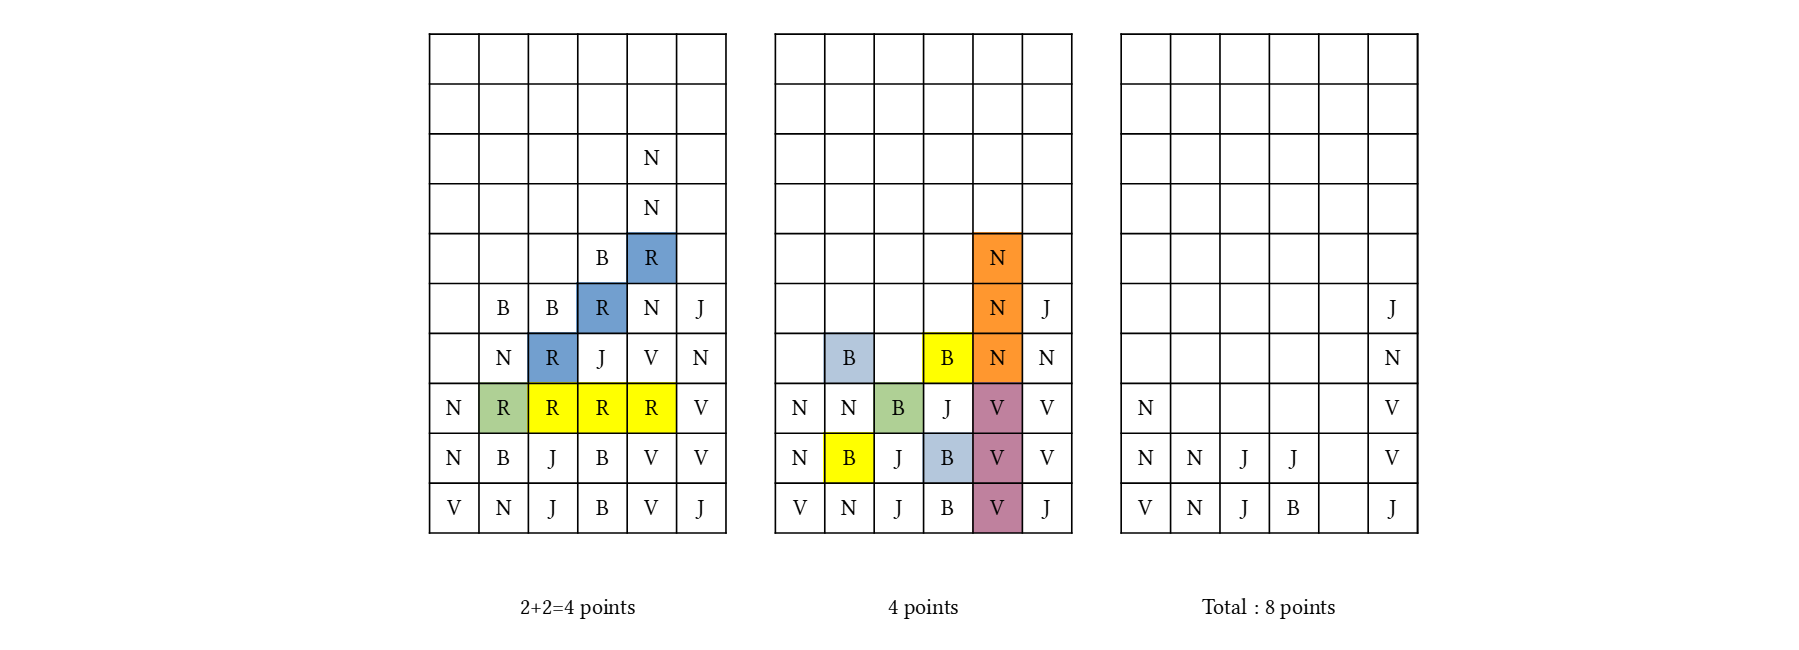

# Question 13

In [59]:
let detecteAlignement rangee = 
    let taille = Array.length rangee in
    let marking = Array.make taille false in
    let rec compte pos score = (* traite a partir de l'indice pos *)
        if pos + 2 >= taille then score
        else if rangee.(pos) <> Vide && rangee.(pos) = rangee.(pos + 1) && rangee.(pos + 1) = rangee.(pos + 2)
            (* alignement detecte, le score est incremente *)
            then begin
                marking.(pos) <- true;
                marking.(pos + 1) <- true;
                marking.(pos + 2) <- true;
                compte (pos + 1) (score + 1)
            end
        else compte (pos + 1) score
    in let s = compte 0 0 in (* on compte a partir de l'indice 0, le score initial vaut 0 *)
    (marking, s)

val detecteAlignement : case array -> bool array * int = <fun>

Ou encore...

In [26]:
let detecteAlignement rangee = 
    let taille = Array.length rangee in
    let marking = Array.make taille false in
    let rec compte pos v nb score =
    (* traite a partir de la position pos, v est la derniere valeur lue (nb fois) *)
        if pos = taille then 
        (* on est arrive au bout *)
            if nb >= 3 then begin
                if v = Vide then score (* alignement Vide *)
                else begin (* alignement couleur *)
                    for i = 1 to nb do
                    marking.(pos - i) <- true
                    done;
                    score + nb - 2
                end
            end
            else score
        else let newv = rangee.(pos) in
        (* on compare la nouvelle valeur lue avec la precedente *)
        if newv <> v then 
            if nb >= 3 then begin
            (* alignement *)
                if v = Vide then compte (pos +1) newv 1 score
                (* reinitialisation du compteur *)
                else begin
                    for i = 1 to nb do
                        marking.(pos - i) <- true
                    done;
                    compte (pos +1) newv 1 (score + nb - 2)
                    end
            end
            else compte (pos +1) newv 1 score
            (* pas assez d'elements, reinitialisation *)
        else compte (pos +1) v (nb + 1) score
        (* tant qu'on lit la meme valeur, on incremente la position et le nb d'occurences *)
    in let s = compte 1 rangee.(0) 1 0 in
    (* on traite a partir de l'indice 1*)
    (* la valeur deja lue est la premiere case de la rangee (1 occurence), le score est nul *)
    (marking, s)

val detecteAlignement : case array -> bool array * int = <fun>

In [60]:
let rangee = [| B; R; R; R; R; J; J; J; Vide; Vide; Vide |]

val rangee : case array = [|B; R; R; R; R; J; J; J; Vide; Vide; Vide|]

In [61]:
detecteAlignement rangee

- : bool array * int =
([|false; true; true; true; true; true; true; true; false; false; false|], 3)

# Question 14

In [86]:
let scoreRangee (grille:grille) (g:grille) i j dx dy =
    let largeur = Array.length g in
    let hauteur = Array.length g.(0) in
    let maxi = ref 1 in (* on cherche la taille de la rangee : on ne doit pas sortir de la grille *)
    while i + !maxi * dx >= 0 && i + !maxi * dx < largeur && j + !maxi * dy >= 0 && j + !maxi * dy < hauteur do
        maxi := !maxi + 1
    done;
    let rangee = Array.make !maxi Vide in
    (* on remplit rangee avec les cases de la grille *)
    for k = 0 to !maxi - 1 do
        rangee.(k) <- grille.(i + k * dx).(j + k * dy)
    done;
    let marking, score = detecteAlignement rangee in
    (* on efface les cases indiquees par marking *)
    for k = 0 to !maxi - 1 do
        if marking.(k) then
            g.(i + k * dx).(j + k * dy) <- Vide
    done;
    score

val scoreRangee : grille -> grille -> int -> int -> int -> int -> int = <fun>

In [75]:
let (grille_test:grille) = [| [|V;    N;    N;    Vide; Vide; Vide; Vide; Vide; Vide; Vide|];
                              [|N;    B;    R;    N;    B;    Vide; Vide; Vide; Vide; Vide|];
                              [|J;    J;    R;    R;    B;    Vide; Vide; Vide; Vide; Vide|];
                              [|B;    B;    R;    J;    R;    B;    Vide; Vide; Vide; Vide|];
                              [|V;    V;    R;    V;    N;    R;    N;    N;    Vide; Vide|];
                              [|J;    V;    V;    N;    J;    Vide; Vide; Vide; Vide; Vide|]|]

val grille_test : grille =
  [|[|V; N; N; Vide; Vide; Vide; Vide; Vide; Vide; Vide|];
    [|N; B; R; N; B; Vide; Vide; Vide; Vide; Vide|];
    [|J; J; R; R; B; Vide; Vide; Vide; Vide; Vide|];
    [|B; B; R; J; R; B; Vide; Vide; Vide; Vide|];
    [|V; V; R; V; N; R; N; N; Vide; Vide|];
    [|J; V; V; N; J; Vide; Vide; Vide; Vide; Vide|]|]

In [76]:
let (g_test:grille) = [| [|V;    N;    N;    Vide; Vide; Vide; Vide; Vide; Vide; Vide|];
                         [|N;    B;    R;    N;    B;    Vide; Vide; Vide; Vide; Vide|];
                         [|J;    J;    R;    R;    B;    Vide; Vide; Vide; Vide; Vide|];
                         [|B;    B;    R;    J;    R;    B;    Vide; Vide; Vide; Vide|];
                         [|V;    V;    R;    V;    N;    R;    N;    N;    Vide; Vide|];
                         [|J;    V;    V;    N;    J;    Vide; Vide; Vide; Vide; Vide|]|]
let () = afficheGrille g_test

val g_test : grille =
  [|[|V; N; N; Vide; Vide; Vide; Vide; Vide; Vide; Vide|];
    [|N; B; R; N; B; Vide; Vide; Vide; Vide; Vide|];
    [|J; J; R; R; B; Vide; Vide; Vide; Vide; Vide|];
    [|B; B; R; J; R; B; Vide; Vide; Vide; Vide|];
    [|V; V; R; V; N; R; N; N; Vide; Vide|];
    [|J; V; V; N; J; Vide; Vide; Vide; Vide; Vide|]|]

In [77]:
let s = scoreRangee grille_test g_test 1 2 1 1
let () = afficheGrille g_test

val s : int = 2

# Question 15

In [78]:
let effaceAlignement (grille:grille) = 
    let largeur = Array.length grille in
    let hauteur = Array.length grille.(0) in
    let (g:grille) = Array.make_matrix largeur hauteur Vide in
    for colonne = 0 to largeur - 1 do
        g.(colonne) <- Array.copy grille.(colonne)
    done;
    let total = ref 0 in
    for i = 0 to largeur - 1 do
        let score = scoreRangee grille g i 0 0 1 in  (* colonnes *)
                        total := !total + score;
        let score = scoreRangee grille g i 0 1 1 in  (* diagonales droites inf *)
                        total := !total + score;
        let score = scoreRangee grille g i 0 (-1) 1 in  (* diagonales gauches inf *)
                        total := !total + score
    done;
    for j = 0 to hauteur - 1 do
        let score = scoreRangee grille g 0 j 1 0 in  (* lignes *)
                        total := !total + score;
        if j <> 0 then
            (let score = scoreRangee grille g 0 j 1 1 in  (* diagonales droites sup *)
                            total := !total + score;
            let score = scoreRangee grille g 0 j (-1) 1 in  (* diagonales gauches sup *)
                            total := !total + score)
    done;
    g, !total

val effaceAlignement : grille -> grille * int = <fun>

In [79]:
let g1, score = effaceAlignement grille_test
let () = afficheGrille g1

val g1 : grille =
  [|[|V; N; N; Vide; Vide; Vide; Vide; Vide; Vide; Vide|];
    [|N; B; Vide; N; B; Vide; Vide; Vide; Vide; Vide|];
    [|J; J; Vide; Vide; B; Vide; Vide; Vide; Vide; Vide|];
    [|B; B; Vide; J; Vide; B; Vide; Vide; Vide; Vide|];
    [|V; V; Vide; V; N; Vide; N; N; Vide; Vide|];
    [|J; V; V; N; J; Vide; Vide; Vide; Vide; Vide|]|]
val score : int = 4

# Question 16

Soit `g` une grille. On note respectivement $\ell$ et $h$ la largeur et la hauteur de la grille.

L'appel `effaceAlignement g` crée une matrice et la remplie en $\Theta (\ell h)$, puis effectue $\ell + h$ itérations au total, dans deux boucles distinctes, lors desquelles on n'effectue que des opérations en temps constant.

Au total, on a donc une complexité $\mathcal{O}(\ell h)$.

# Question 17

In [80]:
let tassementGrille (g:grille) = let largeur, hauteur = Array.length g, Array.length g.(0) in
    for ligne = 0 to hauteur - 1 do
        for colonne = 0 to largeur - 1 do
            if g.(colonne).(ligne) <> Vide then
                descenteRapide g colonne ligne 1
        done
    done

val tassementGrille : grille -> unit = <fun>

Voici une autre version possible, qui diminue un peu le nombre d'opérations effectuées (sans pour autant changer l'ordre de grandeur de la complexité) :

In [81]:
let tassementGrille (g:grille) = let largeur, hauteur = Array.length g, Array.length g.(0) in
    let rec tasse colonne j k = match k with
        (* tasse la colonne i entre les indices j et j + k *)
        | 0 | 1 -> ()
        | _ -> if g.(colonne).(j) = Vide then
                    (descente g colonne (j + 1) (k - 1) ;
                    tasse colonne j (k - 1))
            else tasse colonne (j + 1) (k - 1)
    in for col = 0 to largeur - 1 do
        tasse col 0 hauteur
    done

val tassementGrille : grille -> unit = <fun>

In [82]:
let () = tassementGrille g1
let () = afficheGrille g1

# Question 18

In [83]:
let calculScore (grille:grille) = 
    let rec repete g score = 
        let g_eff, s = effaceAlignement g in
        if s = 0 then
            (for i = 0 to Array.length grille - 1 do
                for j = 0 to Array.length grille.(0) - 1 do
                    grille.(i).(j) <- g_eff.(i).(j)
                done
            done;
            score)
        else 
            (tassementGrille g_eff;
            repete g_eff (score + s))
    in repete grille 0

val calculScore : grille -> int = <fun>

In [84]:
let (g_test:grille) = [| [|V;    N;    N;    Vide; Vide; Vide; Vide; Vide; Vide; Vide|];
                         [|N;    B;    R;    N;    B;    Vide; Vide; Vide; Vide; Vide|];
                         [|J;    J;    R;    R;    B;    Vide; Vide; Vide; Vide; Vide|];
                         [|B;    B;    R;    J;    R;    B;    Vide; Vide; Vide; Vide|];
                         [|V;    V;    R;    V;    N;    R;    N;    N;    Vide; Vide|];
                         [|J;    V;    V;    N;    J;    Vide; Vide; Vide; Vide; Vide|]|]
let () = afficheGrille g_test

val g_test : grille =
  [|[|V; N; N; Vide; Vide; Vide; Vide; Vide; Vide; Vide|];
    [|N; B; R; N; B; Vide; Vide; Vide; Vide; Vide|];
    [|J; J; R; R; B; Vide; Vide; Vide; Vide; Vide|];
    [|B; B; R; J; R; B; Vide; Vide; Vide; Vide|];
    [|V; V; R; V; N; R; N; N; Vide; Vide|];
    [|J; V; V; N; J; Vide; Vide; Vide; Vide; Vide|]|]

In [85]:
let score = calculScore g_test
let () = afficheGrille g_test

val score : int = 8